## 1. Import Libraries/Dataset

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




#### Dataset

In [2]:
data=pd.read_csv('kyphosis.csv')

In [3]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## 2. Data Visualization and Exploration

#### a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

####  b. Print the description and shape of the dataset.

In [7]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [8]:
data.shape

(81, 4)

####  c. Provide appropriate visualization to get an insight about the dataset.

In [9]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Age')

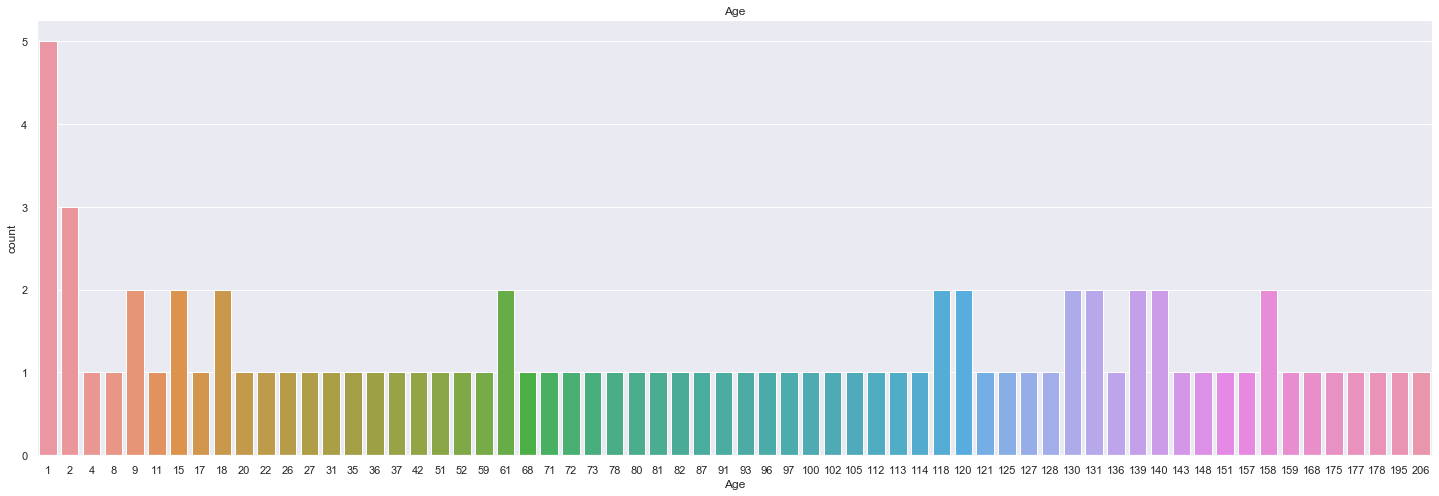

In [10]:
sns.set(rc={'figure.figsize':(25,8)})
g = sns.countplot(data["Age"], ax=None)
g.set_title("Age")


Text(0.5, 1.0, 'With Kyphosis')

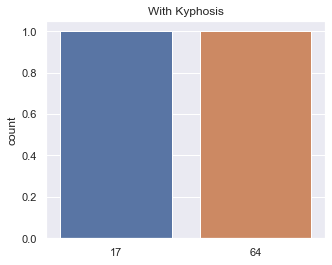

In [11]:
#count kyphosis
sns.set(rc={'figure.figsize':(5,4)})
l = len(data[data["Kyphosis"]=="present"])
g = sns.countplot([l,len(data)-l])
g.set_title("With Kyphosis")

Text(0.5, 1.0, 'Number')

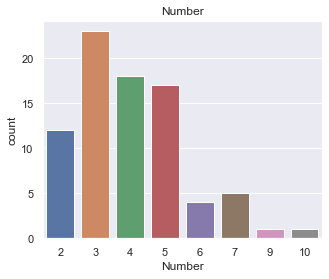

In [12]:
g = sns.countplot(data["Number"])
g.set_title("Number")

Text(0.5, 1.0, 'Start')

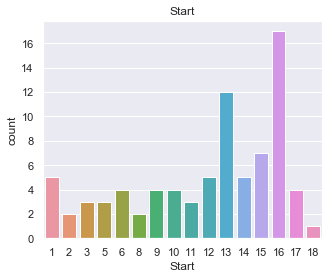

In [13]:
g = sns.countplot(data["Start"])
g.set_title("Start")

### 3. Data Pre-processing and cleaning

#### a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.

In [14]:
#Now First check should be any Null is present or not
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [15]:
data['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

In [16]:
data['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [17]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [18]:
for col in data:
     if(col=='Kyphosis'):
            data[col]= data[col].map({'absent':0,'present':1})
            

In [19]:
data['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [22]:
data1=data

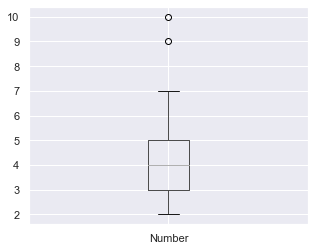

In [23]:
data1.boxplot(column=['Number'])

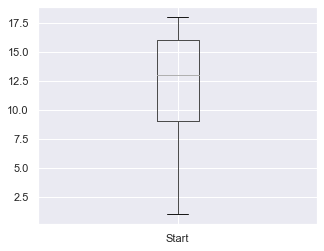

In [24]:
data1.boxplot(column=['Start'])

### b. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

In [25]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)

In [26]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-4.11193713e-18  1.00057137e-16 -1.36550579e-16 -9.04626168e-17]
[1. 1. 1. 1.]


In [27]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)

In [28]:
print('means (Age, Number and Start): ', data_scaled.mean(axis=0))
print('std (Age, Number and Start): ', data_scaled.std(axis=0))

means (Age, Number and Start):  [0.20987654 0.40319181 0.25617284 0.61728395]
std (Age, Number and Start):  [0.40722031 0.28168034 0.20117444 0.28551298]


## 4. Data Preparation

#### a. Do the final feature selection and extract them into Column X and the class label into Column into Y.
#### b. Split the dataset into training and test sets.

In [29]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [30]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [31]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train.shape,x_test.shape

((64, 3), (17, 3))

# Part B
## 1. Model Building

#### a. Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.


## In this dataset i will use LinearRegression, LogisticRegression and K-Nearst Neighbor

In [35]:
#LinearRegression
from sklearn.linear_model import LinearRegression

In [36]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred=reg.predict(x_test)

In [38]:
from sklearn import metrics 
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean_squared_error:",mse)

Mean_squared_error: 0.16023182312345982


In [39]:
rmse=np.sqrt(mse)
print("Root_Mean_squared_Error:",rmse)

Root_Mean_squared_Error: 0.40028967401553067


In [40]:
# LogisticRegression

In [41]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [42]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [43]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression()

In [48]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred=log_reg.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [52]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

Accuracy_Score: 0.8235294117647058


In [53]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 3,  0]], dtype=int64)

In [54]:
#K-Nearst Neighbor
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

### b. Train the model and print the training accuracy and loss values.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
k_range=list(range(3,10))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))

In [58]:
acc

[0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058]

## 2.Performance Evaluation
### a. Print the confusion matrix. Provide appropriate analysis for the same.


In [59]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 3,  0]], dtype=int64)